In [91]:
%matplotlib inline

import numpy as np
import cv2 as cv
import imutils
import matplotlib.pyplot as plt

In [92]:
def logo_coca_template_matching(img_gray, img_rgb, template):
    edged_img = cv.Canny(img_gray, 150, 250)

    found = None
    for scale in np.linspace(0.2, 3.0, 40):

        resized = imutils.resize(template, width = int(template.shape[1] * scale))
        edged_template = cv.Canny(resized, 150, 250)
        w, h = resized.shape[::-1]

        if img_gray.shape[0] < h or img_gray.shape[1] < w:
            break

        res = cv.matchTemplate(edged_img, edged_template, cv.TM_CCOEFF)

        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

        if found is None or max_val > found[0]:
            found = (max_val, max_loc, h, w)

    (max_val, top_left, h, w) = found
    bottom_right = ((top_left[0] + w), (top_left[1] + h))
    cv.rectangle(img_rgb, top_left, bottom_right, (0, 0, 255), 2)

    plt.figure()

    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_rgb)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

    plt.show()

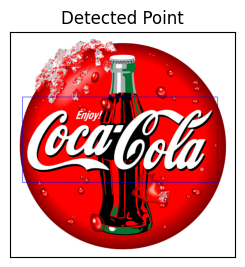

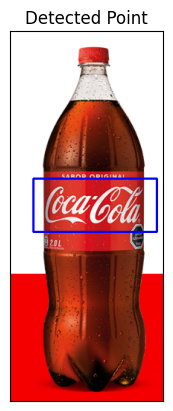

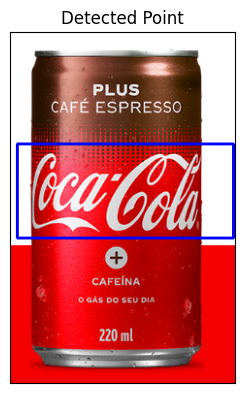

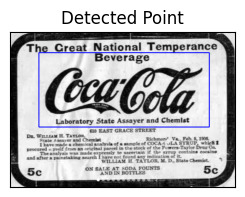

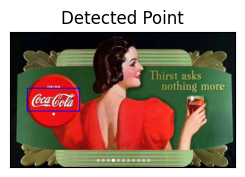

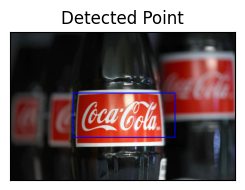

In [93]:
images = ['images/COCA-COLA-LOGO.jpg', 'images/coca_logo_1.png', 'images/coca_logo_2.png',
          'images/coca_retro_1.png', 'images/coca_retro_2.png', 'images/logo_1.png']

template = cv.imread('template/pattern.png', 0)
    
for image in images:
    img = cv.imread(image)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

    logo_coca_template_matching(img_gray, img_rgb, template)

### Conclusión

#### Para poder obtener resultados correctos en todas las imágenes fue necesario ir cambiando el tamaño del template y probando la función de matchTemplate hasta lograr el mejor resultado según el método utilizado (max_val para el coeficiente de correlación).
#### A su vez se utilizó Canny para obtener la informacíon más relevante de la imagen y del template con el objetivo de disminuir la posibilidad de obtener falsos positivos.

(564, 720)


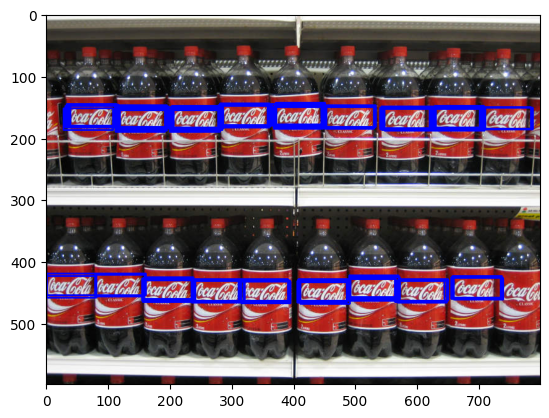

In [94]:
img_rgb = cv.imread('images/coca_multi.png')
img_rgb = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('template/pattern.png', 0)

edged_img = cv.Canny(img_gray, 150, 250)

resized = imutils.resize(template, width = int(template.shape[1] * 0.2))
edged_template = cv.Canny(resized, 150, 250)
w, h = resized.shape[::-1]

res = cv.matchTemplate(edged_img, edged_template, cv.TM_CCOEFF)

min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

# Se escala el threshold utilizado al max_val obtenido
threshold = max_val*0.73

loc = np.where(res >= threshold)
print(res.shape)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

plt.figure()
plt.imshow(img_rgb)

### Conclusión

#### En este caso, a pesar de no ser necesario en primera instancia, se utilizó la función minMaxLoc para obtener un valor de threshold escalado, debido a que los valores obtenidos no se encuentran entre 0 y 1, ya que no se utiliza un método normalizado. Luego se obtienen todos los pixels en donde el resultado obtenido es mayor al threshold y se dibujan las detecciones logradas.

In [95]:
def multi_single_template_matching(img_gray, img_rgb, template):
    edged_img = cv.Canny(img_gray, 150, 250)

    found = None

    threshold_1 = 0.78
    threshold_2 = 0.75
    for scale in np.linspace(0.2, 3.0, 40)[::-1]:
        resized = imutils.resize(template, width=int(template.shape[1] * scale))
        edged_template = cv.Canny(resized, 150, 250)
        w, h = resized.shape[::-1]

        if img_gray.shape[0] < h or img_gray.shape[1] < w:
            continue

        res = cv.matchTemplate(edged_img, edged_template, cv.TM_CCOEFF)

        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

        if found is None or max_val > found[0]*threshold_1:
            found = (max_val, max_loc, h, w, res)

    (max_val, _, h, w, res) = found

    threshold = max_val*threshold_2

    loc = np.where(res >= threshold)
    for pt in zip(*loc[::-1]):
        cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

    plt.figure()
    plt.imshow(img_rgb)
    # cv.imwrite('res.png',img_rgb)

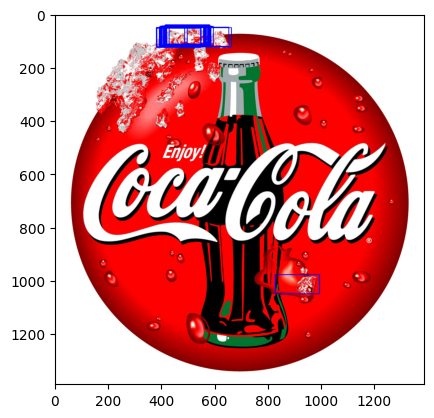

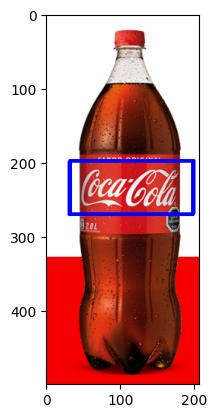

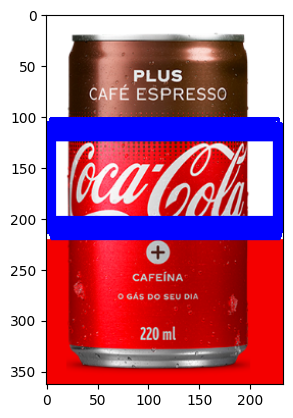

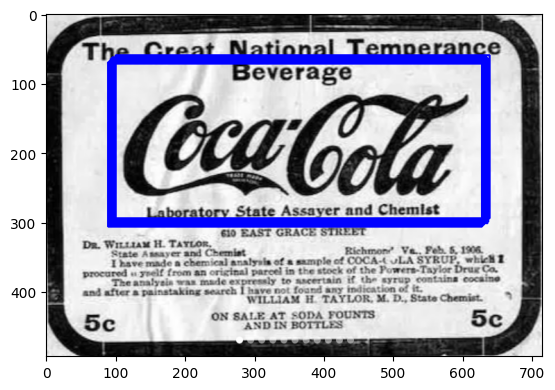

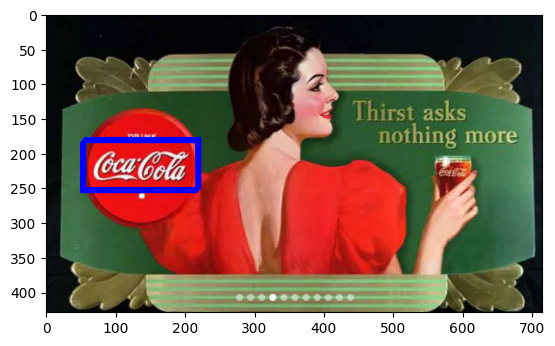

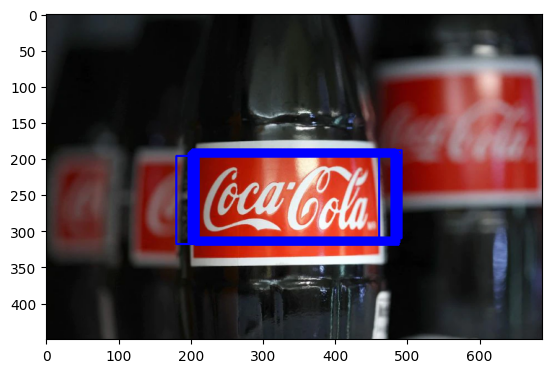

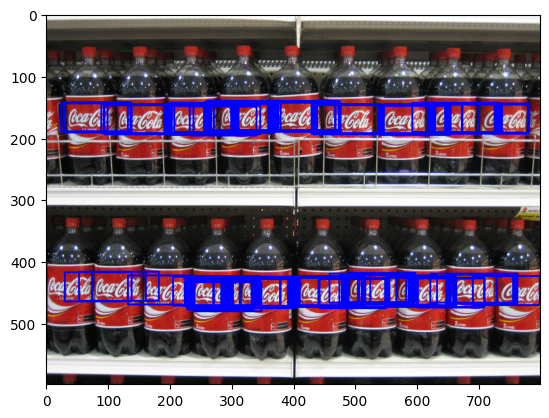

In [96]:
images = ['images/COCA-COLA-LOGO.jpg', 'images/coca_logo_1.png', 'images/coca_logo_2.png',
          'images/coca_retro_1.png', 'images/coca_retro_2.png', 'images/logo_1.png', 'images/coca_multi.png']

template = cv.imread('template/pattern.png', 0)
    
for image in images:
    img = cv.imread(image)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

    multi_single_template_matching(img_gray, img_rgb, template)

### Conclusión

#### Se buscó unir los métodos utilizados en los puntos 1 y 2 logrando un éxito parcial. Dependiendo de los valores de threshold_1 y threshold_2 es posible mejorar la detección de la imagen multi o mejorar las detecciones de las imágenes simples. No se logró encontrar la forma de detectar correctamente todas las imágenes simples y la múltiple. Si threshold_1 y threshold_2 son iguales a 1, se detectan perfectamente todas las imágenes simples ya que se vuelve al algoritmo del punto 1. Si threshold_1 y threshold_2 son 0.70 y 0.73 se mejora mucho la detección en la imagen múltiple pero se pierde la detección en algunas imágenes simples.